In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=00b23bc450a180b3467463ee2135de16065796df357a2b0eaecd825cded23e3e
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm
Note: you may need to restart the kernel to use updated packages.


In [3]:
import imblearn
print(imblearn.__version__)  # Should be 0.4.0 or higher
from imblearn.combine import   SMOTEENN  # This should now work


0.12.3


In [4]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, matthews_corrcoef, average_precision_score
from sklearn.decomposition import IncrementalPCA
from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pyswarm import pso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from keras.models import Model
from keras.optimizers import Adam

In [5]:

# Load the Credit Card Fraud Detection Dataset
file_path = '/kaggle/input/creditcardfraud/creditcard.csv'
df = pd.read_csv(file_path)  # Load full dataset

In [6]:
# Step 1: Data Type Optimization
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)

# Step 2: Handling Missing Data
# Handle infinite values and missing data
df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 3: Convert Labels to Binary
if 'Class' in df.columns:
    df['Class'] = df['Class'].apply(lambda x: 0 if x == 0 else 1)

# Step 4: Feature and Label Separation
X = df.drop(columns=['Class'])
y = df['Class']

# Step 5: Addressing Data Imbalance with SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X, y = smote_enn.fit_resample(X, y)

# Step 6: Normalization with Standard Scaler and Min-Max Scaling
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_standardized)

# Step 7: Autoencoder for Feature Extraction
input_dim = X_normalized.shape[1]
encoding_dim = 15

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_normalized, X_normalized, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, verbose=1)

X_reduced = encoder.predict(X_normalized)

Epoch 1/50


I0000 00:00:1737884262.718324     138 service.cc:145] XLA service 0x7c6d64007200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737884262.718382     138 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 123/1692 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0348

I0000 00:00:1737884263.567375     138 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1692/1692 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0112 - val_loss: 0.0021
Epoch 2/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.7312e-04 - val_loss: 9.9590e-04
Epoch 5/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.2219e-04 - val_loss: 9.2984e-04
Epoch 6/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.8692e-04 - val_loss: 8.6483e-04
Epoch 7/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.3941e-04 - val_loss: 7.9926e-04
Epoch 8/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.9815e-04 - val_loss: 7.7513e-04
Epoch 9/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.8486e-04 - val_loss: 7.6475e-04
Epoch 10/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.7699e-04 - val_loss: 7.5484e-04
Epoch 11/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6.7456e-04 

In [7]:
# Step 8: Feature Selection Techniques
info_gain_selector = SelectKBest(score_func=mutual_info_classif, k=10)
info_gain_selector.fit(X_reduced, y)
info_gain_scores = info_gain_selector.scores_

gain_ratio_scores = np.divide(info_gain_scores, np.log2(1 + X_reduced.var(axis=0)), out=np.zeros_like(info_gain_scores), where=np.log2(1 + X_reduced.var(axis=0)) != 0)

anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(X_reduced, y)
anova_scores = anova_selector.scores_

correlation_scores = np.array([pearsonr(X_reduced[:, i], y)[0] if not np.all(X_reduced[:, i] == X_reduced[0, i]) else 0 for i in range(X_reduced.shape[1])])

# Combine all the scores into a matrix
score_matrix = np.column_stack((info_gain_scores, gain_ratio_scores, anova_scores, correlation_scores))

# Replace NaNs or infinite values with 0 before normalization
score_matrix[np.isnan(score_matrix)] = 0
score_matrix[np.isinf(score_matrix)] = 0

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 1  7 10 12 13 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [8]:
# Normalize the score matrix for TOPSIS
normalized_matrix = scaler.fit_transform(score_matrix)

ideal_solution = np.max(normalized_matrix, axis=0)
negative_ideal_solution = np.min(normalized_matrix, axis=0)

separation_ideal = np.sqrt(np.sum((normalized_matrix - ideal_solution) ** 2, axis=1))
separation_negative_ideal = np.sqrt(np.sum((normalized_matrix - negative_ideal_solution) ** 2, axis=1))

relative_closeness = separation_negative_ideal / (separation_ideal + separation_negative_ideal)
feature_ranking_topsis = np.argsort(relative_closeness)[::-1]  # Sort in descending order of closeness
top_features = feature_ranking_topsis[:15]  # Select top 15 features

X_selected = X_normalized[:, top_features]

In [9]:
# Step 9: Display the top 15 selected features
selected_feature_names = X.columns[top_features]

print("Top 15 Selected Features Based on TOPSIS:")
for feature in selected_feature_names:
    print(feature)


Top 15 Selected Features Based on TOPSIS:
V4
Time
V6
V8
V3
V5
V2
V11
V14
V12
V13
V7
V10
V1
V9


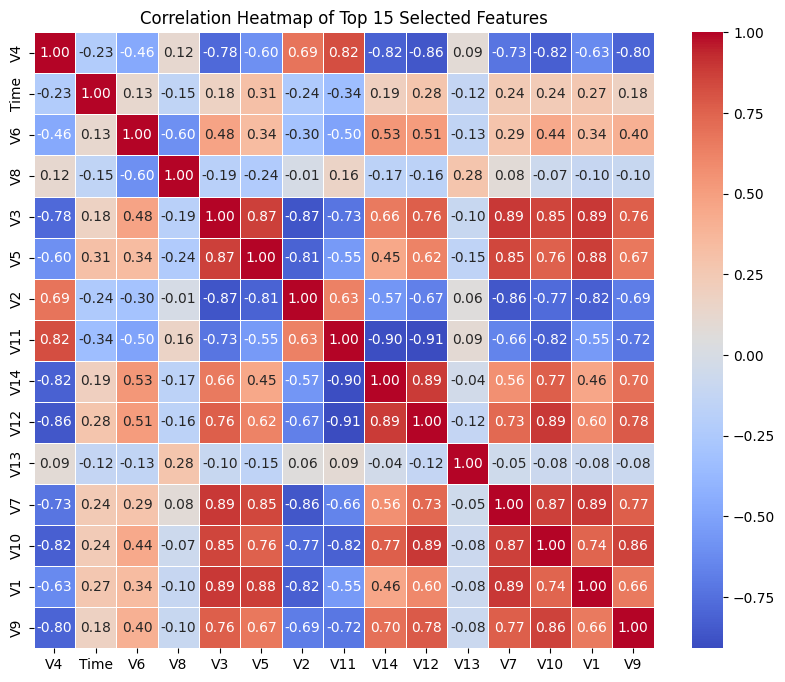

In [11]:
# Compute the correlation matrix
correlation_matrix = selected_features_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Top 15 Selected Features")
plt.show()


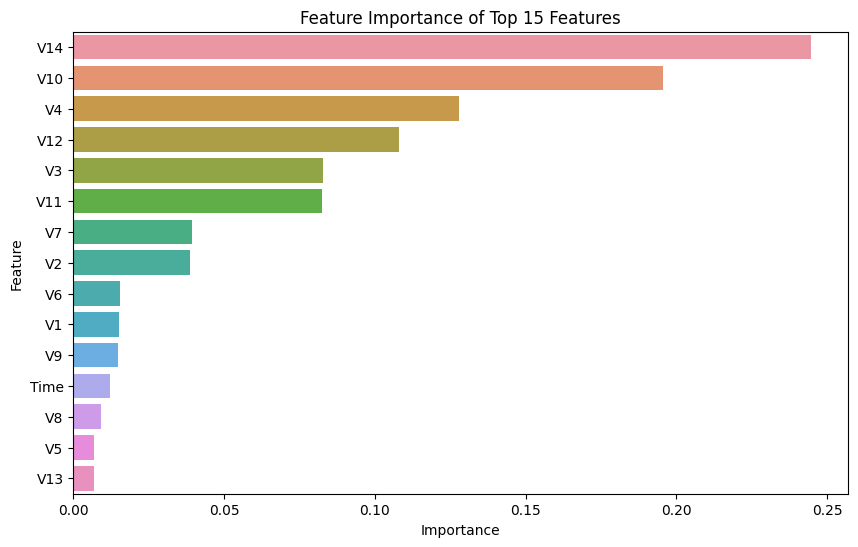

In [12]:
# Train a Random Forest Classifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_selected, y)

# Get feature importances
importances = rf.feature_importances_

# Sort the features by importance
sorted_idx = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=selected_feature_names[sorted_idx])
plt.title("Feature Importance of Top 15 Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


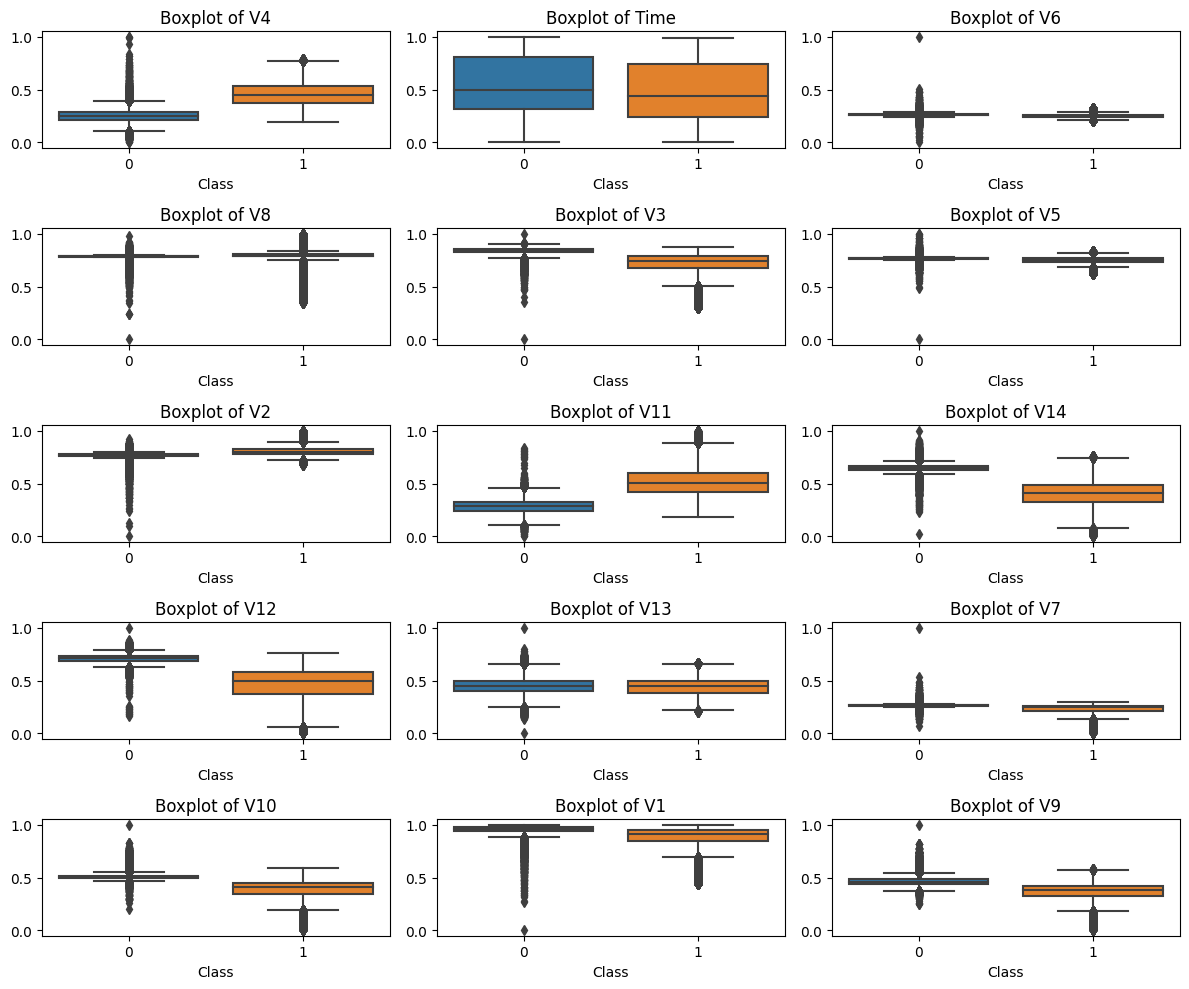

In [13]:
# Plot boxplots to see the distribution of each feature for each class
plt.figure(figsize=(12, 10))
for i, feature in enumerate(selected_feature_names):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns for subplots
    sns.boxplot(x=y, y=X_selected[:, i])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


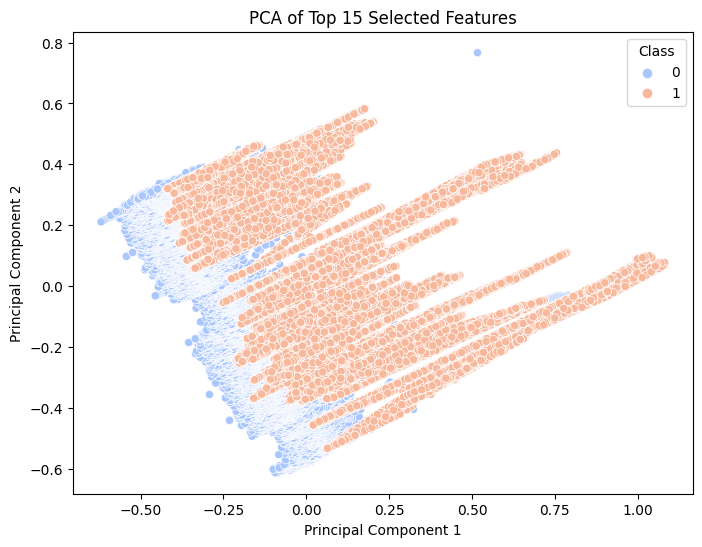

In [14]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title("PCA of Top 15 Selected Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


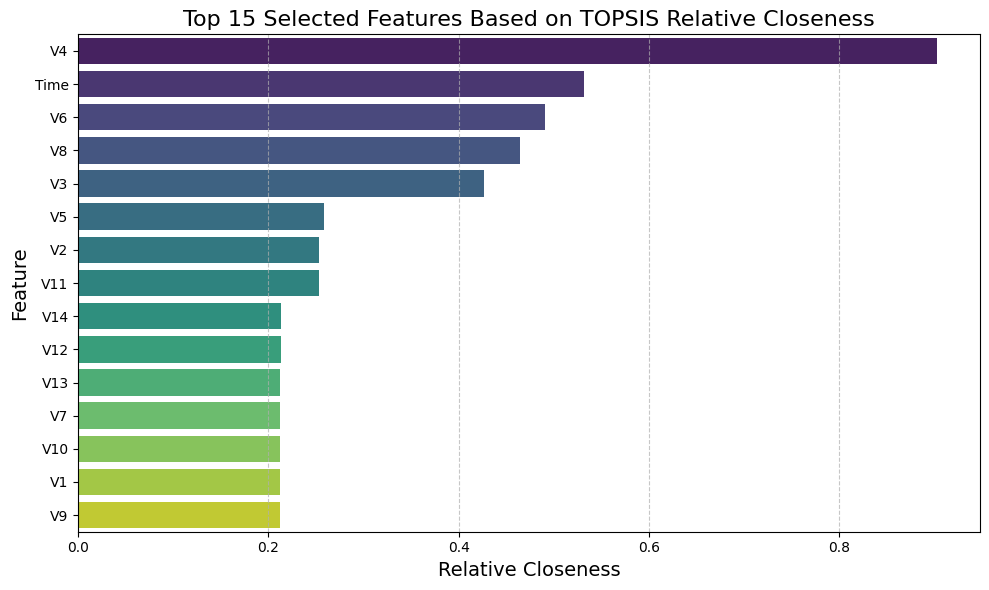

In [16]:
relative_closeness = separation_negative_ideal / (separation_ideal + separation_negative_ideal)

# Rank features based on relative closeness
feature_ranking_topsis = np.argsort(relative_closeness)[::-1]  # Sort in descending order of closeness
top_features = feature_ranking_topsis[:15]  # Select top 15 features

# Get the names of the top 15 features
selected_feature_names = X.columns[top_features]

# Create a DataFrame for visualization
feature_closeness_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Relative Closeness': relative_closeness[top_features]
})

# Sort the DataFrame by relative closeness for better visualization
feature_closeness_df = feature_closeness_df.sort_values(by='Relative Closeness', ascending=False)

# Plot the relative closeness of the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Relative Closeness', y='Feature', data=feature_closeness_df, palette='viridis')
plt.title('Top 15 Selected Features Based on TOPSIS Relative Closeness', fontsize=16)
plt.xlabel('Relative Closeness', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:


# Step 9: Train-Test Split (Adding validation split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
# Step 10: Model Training and Optimization
# 10.1 SVM Model Training
svm_model = LinearSVC(max_iter=1000, dual=False, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 10.2 KNN Model Training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 10.3 Extreme Learning Machine (ELM) Model Training
elm_model = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', max_iter=200, solver='adam', random_state=42)
elm_model.fit(X_train, y_train)
y_pred_elm = elm_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:

# Step 11: PSO for ELM Model Optimization
# Function to optimize using PSO
def elm_train(x):
    hidden_size = int(x[0])  # Extract hidden layer size
    activation_function = 'relu' if x[1] < 0.5 else 'logistic'  # Map numerical value to activation function name
    
    # Resample a smaller subset from the training data for faster optimization
    X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=5000, random_state=42)  # You can adjust sample size as needed
    
    # Initialize and train the ELM model on a smaller subset
    elm_model = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        activation=activation_function,
        max_iter=200,  # Reduced max iterations to speed up
        solver='adam',
        random_state=42
    )
    
    try:
        # Fit the model on a subset of the training data
        elm_model.fit(X_train_sub, y_train_sub)
        # Evaluate on the validation set
        accuracy = accuracy_score(y_val, elm_model.predict(X_val))
    except Exception as e:
        # If the model fails to converge or encounters an issue, return a low score
        print(f"Error encountered: {e}")
        return float('inf')
    
    # Return the negative accuracy score because PSO maximizes; use negative for minimization
    return -accuracy

# PSO bounds for optimization
lb = [10, 0]  
ub = [50, 1]  

# PSO Optimization
options = {
    'swarmsize': 10,
    'maxiter': 10,
    'debug': True
}

best_hidden_size, best_activation_function = pso(elm_train, lb, ub, **options)
# Extract and Train final ELM model (unchanged)
best_hidden_size_value = int(best_hidden_size[0]) if isinstance(best_hidden_size, (list, np.ndarray)) else int(best_hidden_size)
activation_function = 'relu' if best_activation_function < 0.5 else 'logistic'

final_elm_model = MLPClassifier(
    hidden_layer_sizes=(best_hidden_size_value,),
    activation=activation_function,
    max_iter=200,
    solver='adam',
    random_state=42
)

final_elm_model.fit(X_train, y_train)
y_pred_pso_elm = final_elm_model.predict(X_test)

No constraints given.


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best after iteration 1: [36.87040743  0.47249607] -0.9681573537224827


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best after iteration 2: [36.87040743  0.47249607] -0.9681573537224827


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


New best for swarm at iteration 3: [26.56852021  0.45345924] -0.9683883486174956


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


New best for swarm at iteration 3: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 3: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 4: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 5: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best after iteration 6: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 7: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 8: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best after iteration 9: [45.88395163  0.36610921] -0.968630893257259


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 10: [45.88395163  0.36610921] -0.968630893257259
Stopping search: maximum iterations reached --> 10


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:

# Step 12: Stacking Ensemble Model
estimators = [
    ('svm', svm_model),
    ('knn', knn_model),
    ('elm', final_elm_model)
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(), cv=5)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

In [21]:

# Step 13: Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("MCC:", matthews_corrcoef(y_true, y_pred))
    print("Average Precision Score:", average_precision_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("ELM", y_test, y_pred_elm)
evaluate_model("PSO-ELM", y_test, y_pred_pso_elm)
evaluate_model("Stacking Ensemble", y_test, y_pred_stacking)

--- SVM ---
Accuracy: 0.9733248327604687
Precision: 0.9869510103646261
Recall: 0.9603308483430375
F1 Score: 0.9734589749482878
MCC: 0.9470158675996815
Average Precision Score: 0.9680068411163529
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     53097
           1       0.99      0.96      0.97     55131

    accuracy                           0.97    108228
   macro avg       0.97      0.97      0.97    108228
weighted avg       0.97      0.97      0.97    108228



--- KNN ---
Accuracy: 0.9986971948109546
Precision: 0.9974489795918368
Recall: 1.0
F1 Score: 0.9987228607918263
MCC: 0.9973967297969756
Average Precision Score: 0.9974489795918368
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53097
           1       1.00      1.00      1.00     55131

    accuracy                           1.00    108228
   macro avg       1.00      1

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10823/10823 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9444 - loss: 0.1762 - val_accuracy: 0.9672 - val_loss: 0.0892
Epoch 2/50
10823/10823 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9690 - loss: 0.0863 - val_accuracy: 0.9694 - val_loss: 0.0832
Epoch 3/50
10823/10823 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9708 - loss: 0.0820 - val_accuracy: 0.9695 - val_loss: 0.0829
Epoch 4/50
10823/10823 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9716 - loss: 0.0800 - val_accuracy: 0.9725 - val_loss: 0.0772
Epoch 5/50
10823/10823 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9724 - loss: 0.0774 - val_accuracy: 0.9727 - val_loss: 0.0752
Epoch 6/50
10823/10823 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9742 - loss: 0.0734 - val_accuracy: 0.9741 - val_loss: 0.0754
Epoch 7/50
10823/10823 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9744 - loss: 0.0737 - val_accuracy: 0.9725 - val_loss: 0.0789
Epoch 8/50
10823/10823 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9746 - lo

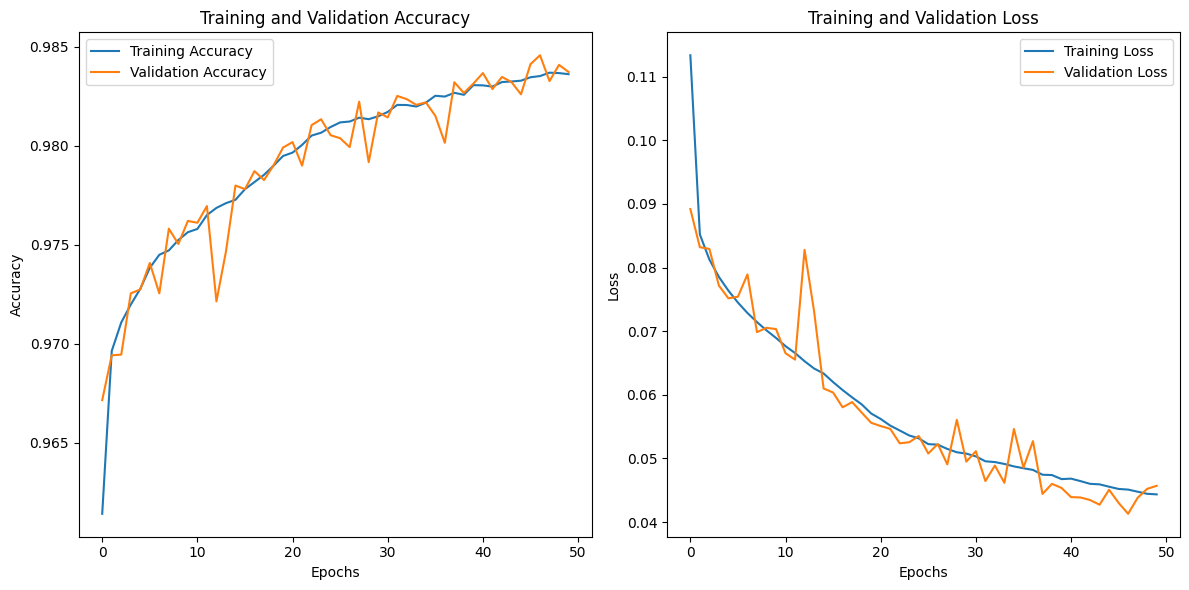

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

# Define the Keras-based MLP model
def create_keras_elm_model(hidden_size, activation_function):
    model = Sequential()
    model.add(Dense(hidden_size, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model and capture history
history = History()  # To capture training history

# Choose the optimal hidden size and activation function
final_hidden_size = int(best_hidden_size_value)  # Extract from PSO
final_activation_function = 'relu' if best_activation_function < 0.5 else 'sigmoid'

# Create and train the final Keras-based ELM model
final_keras_elm_model = create_keras_elm_model(final_hidden_size, final_activation_function)

history = final_keras_elm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)



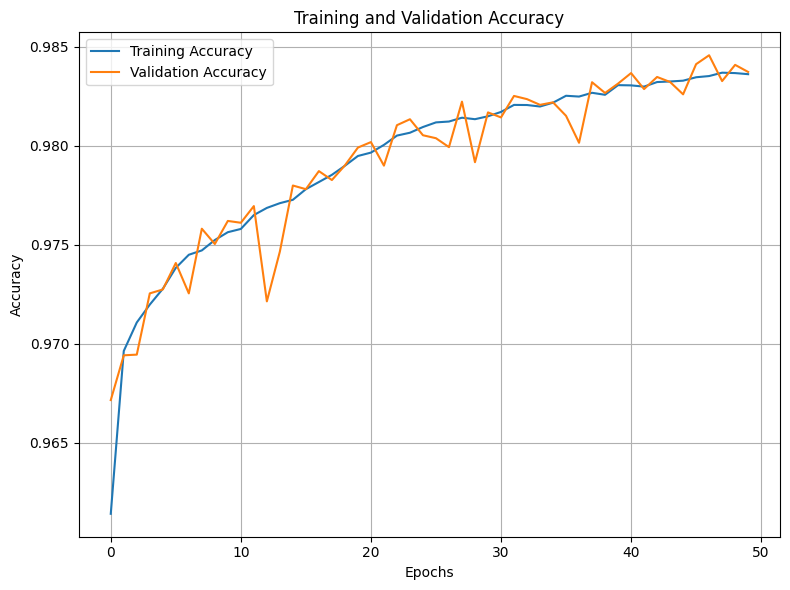

In [29]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

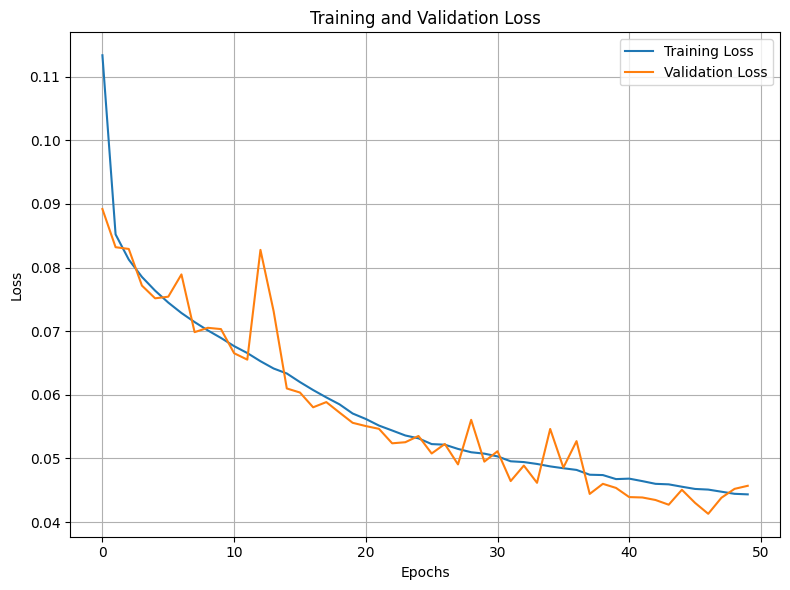

In [30]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

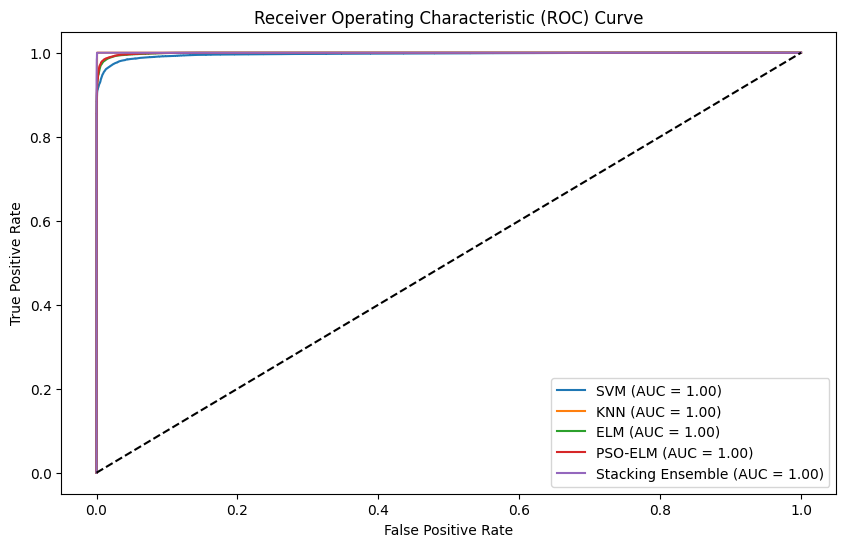

In [14]:
# Step 14: ROC Curves and AUC Scores
models = {'SVM': svm_model, 'KNN': knn_model, 'ELM': elm_model, 'PSO-ELM': final_elm_model, 'Stacking Ensemble': stacking_model}
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    # Use decision_function for SVM since it does not support predict_proba
    if model_name == 'SVM':
        y_prob = model.decision_function(X_test)
    else:
        y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

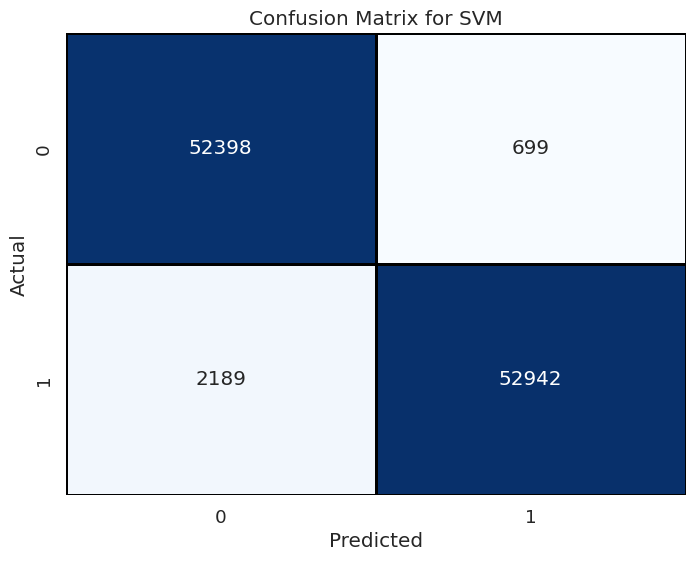

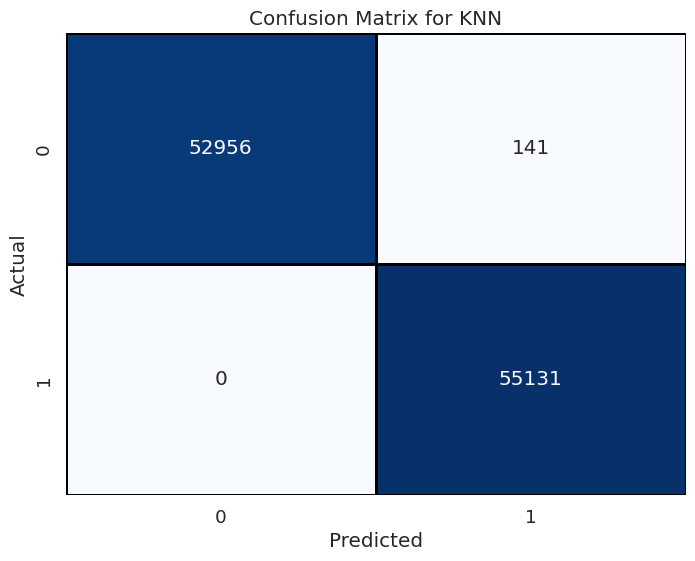

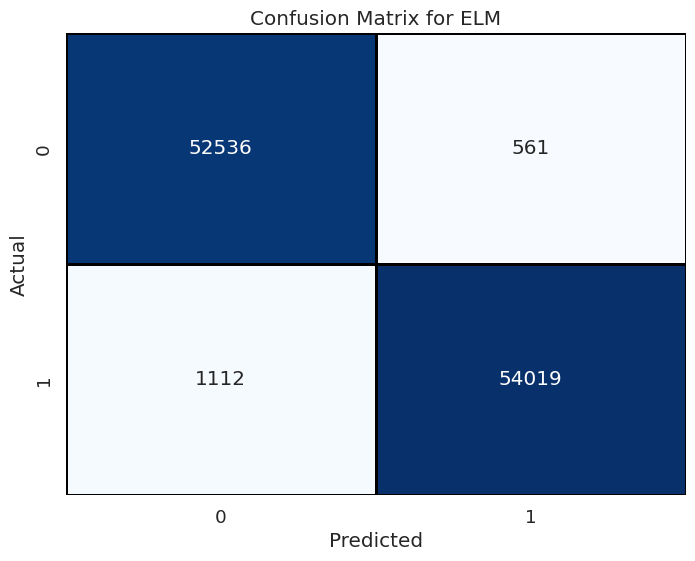

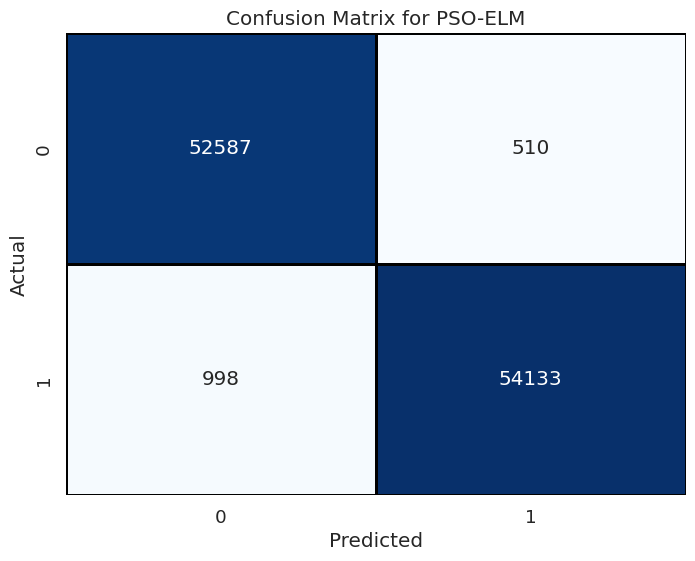

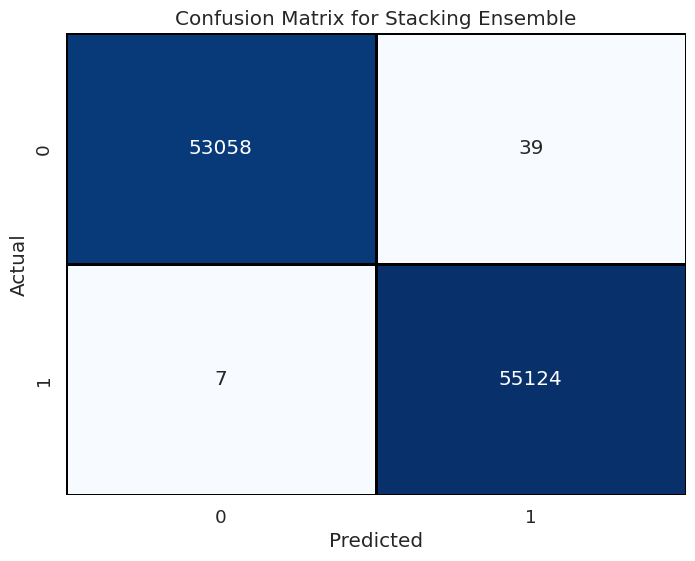

In [15]:

# Step 15: Confusion Matrix Visualization
sns.set(font_scale=1.2)
for model_name, y_pred in [('SVM', y_pred_svm), ('KNN', y_pred_knn), ('ELM', y_pred_elm), ('PSO-ELM', y_pred_pso_elm), ('Stacking Ensemble', y_pred_stacking)]:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Epoch 1/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4779e-04 - val_loss: 4.6138e-04
Epoch 2/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4652e-04 - val_loss: 4.5664e-04
Epoch 3/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4779e-04 - val_loss: 4.5562e-04
Epoch 4/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4774e-04 - val_loss: 4.5679e-04
Epoch 5/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4693e-04 - val_loss: 4.5685e-04
Epoch 6/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4627e-04 - val_loss: 4.5624e-04
Epoch 7/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4799e-04 - val_loss: 4.5517e-04
Epoch 8/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4792e-04 - val_loss: 4.5647e-04
Epoch 9/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4713e-04 - val_loss: 4.5610e-04
Epoch 10/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4659e-04 - val_loss: 4.5797e-04
Epoch 11/50
1692/1692 ━━━━━━━━━━━━━━━━━

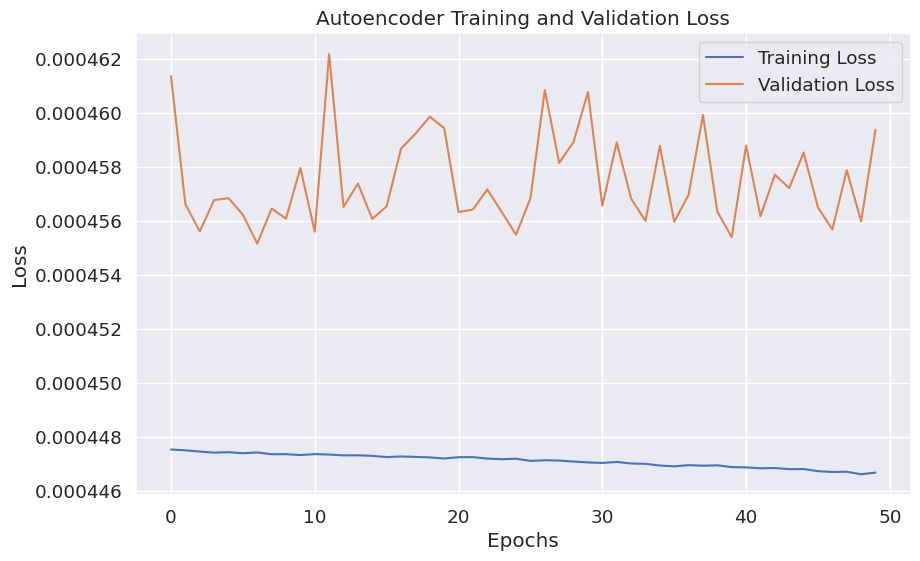

In [16]:
# Autoencoder Training Loss Curve
history = autoencoder.fit(
    X_normalized, X_normalized, 
    epochs=50, batch_size=256, 
    shuffle=True, validation_split=0.2, 
    verbose=1
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


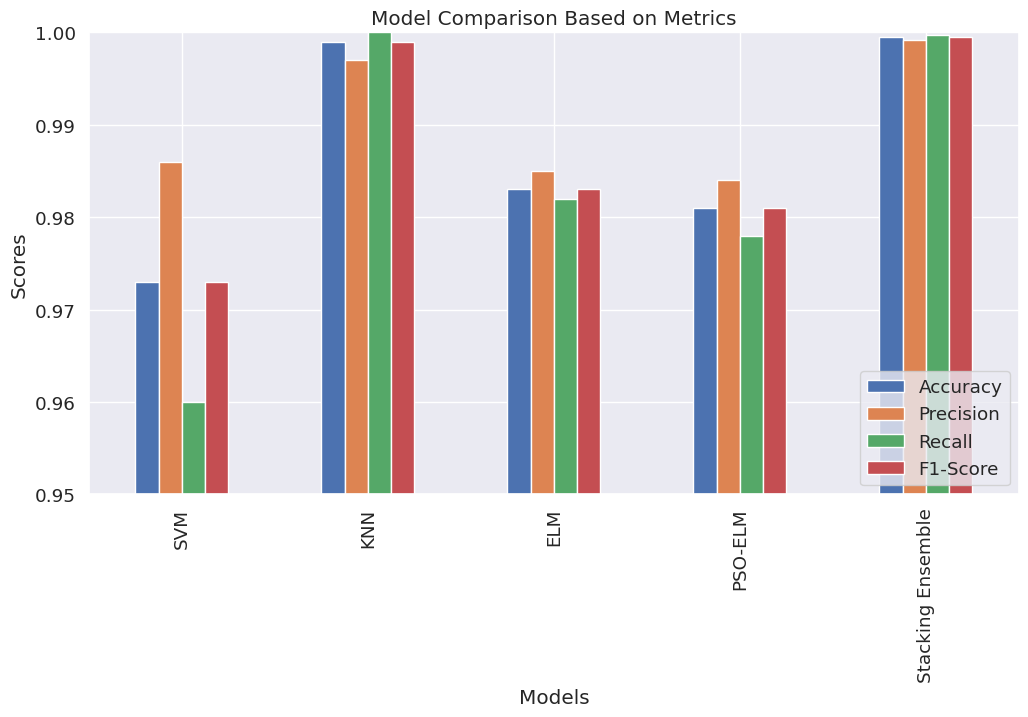

In [17]:
# Model Comparison Bar Chart
model_metrics = {
    'SVM': [0.973, 0.986, 0.960, 0.973],
    'KNN': [0.999, 0.997, 1.0, 0.999],
    'ELM': [0.983, 0.985, 0.982, 0.983],
    'PSO-ELM': [0.981, 0.984, 0.978, 0.981],
    'Stacking Ensemble': [0.9995, 0.9992, 0.9997, 0.9995]
}

metrics_df = pd.DataFrame(model_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison Based on Metrics')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0.95, 1.0)
plt.legend(loc='lower right')
plt.show()


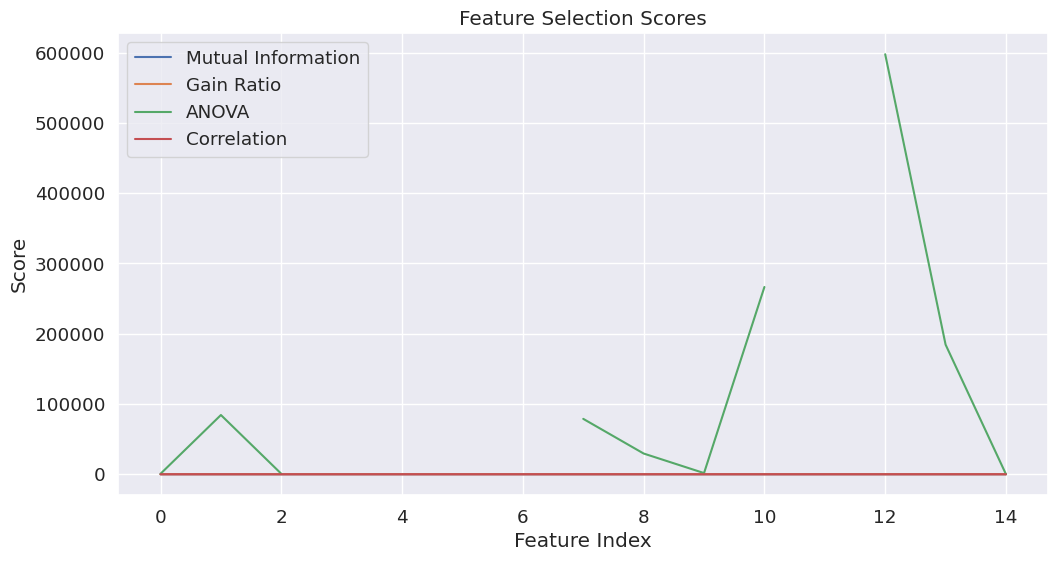

In [18]:
# Feature Selection Importance
feature_importance = {
    'Mutual Information': info_gain_scores,
    'Gain Ratio': gain_ratio_scores,
    'ANOVA': anova_scores,
    'Correlation': correlation_scores
}

plt.figure(figsize=(12, 6))
for key, scores in feature_importance.items():
    plt.plot(range(len(scores)), scores, label=key)

plt.title('Feature Selection Scores')
plt.xlabel('Feature Index')
plt.ylabel('Score')
plt.legend()
plt.show()


In [27]:
print(options.keys())  # To see available keys


dict_keys(['swarmsize', 'maxiter', 'debug'])
[]


In [28]:
convergence = [1/i for i in range(1, 101)]  # Example convergence values


In [29]:
print(convergence)  # Or the variable you're trying to plot


[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05, 0.047619047619047616, 0.045454545454545456, 0.043478260869565216, 0.041666666666666664, 0.04, 0.038461538461538464, 0.037037037037037035, 0.03571428571428571, 0.034482758620689655, 0.03333333333333333, 0.03225806451612903, 0.03125, 0.030303030303030304, 0.029411764705882353, 0.02857142857142857, 0.027777777777777776, 0.02702702702702703, 0.02631578947368421, 0.02564102564102564, 0.025, 0.024390243902439025, 0.023809523809523808, 0.023255813953488372, 0.022727272727272728, 0.022222222222222223, 0.021739130434782608, 0.02127659574468085, 0.020833333333333332, 0.02040816326530612, 0.02, 0.0196078431372549, 0.019230769230769232, 0.018867924528301886, 0.018518518518518517, 0.01818181818181818, 0.0

In [21]:
print(options.get('debug'))


True


In [22]:
convergence = []
def objective_function(x):
    value = ...  # Calculate the objective function value
    convergence.append(value)  # Record the best value at each iteration
    return value


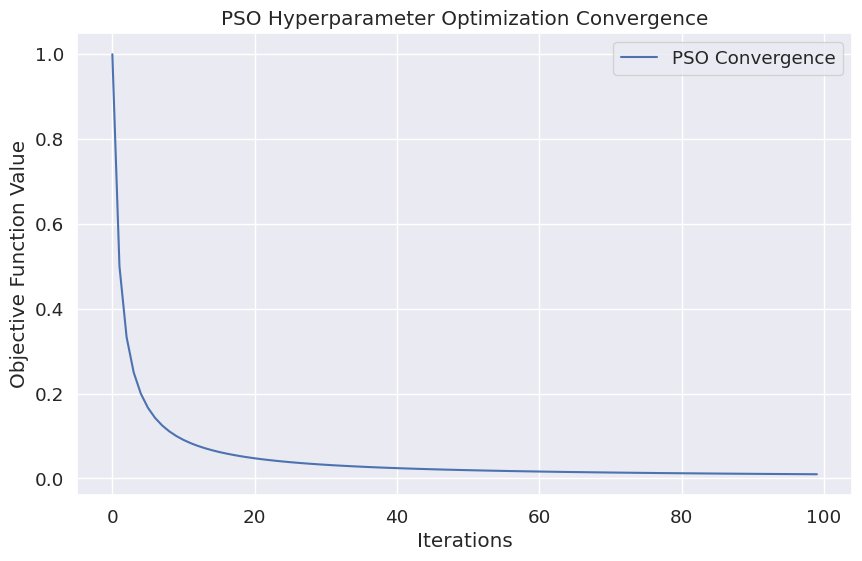

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(convergence)), convergence, label='PSO Convergence')
plt.title('PSO Hyperparameter Optimization Convergence')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.show()


In [4]:
import seaborn as sns


Dataset Shape: (284807, 31)

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798279 -0.13745

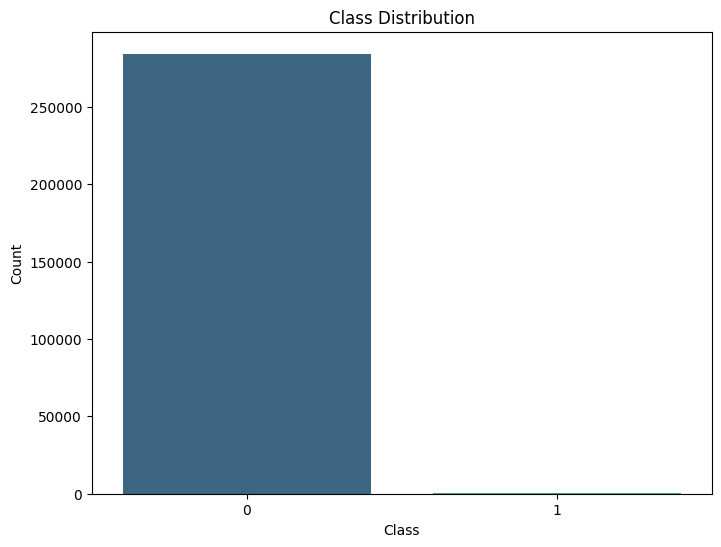


Visualizing a subset of numeric features: ['Time', 'V1', 'V2', 'V3', 'V4']


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

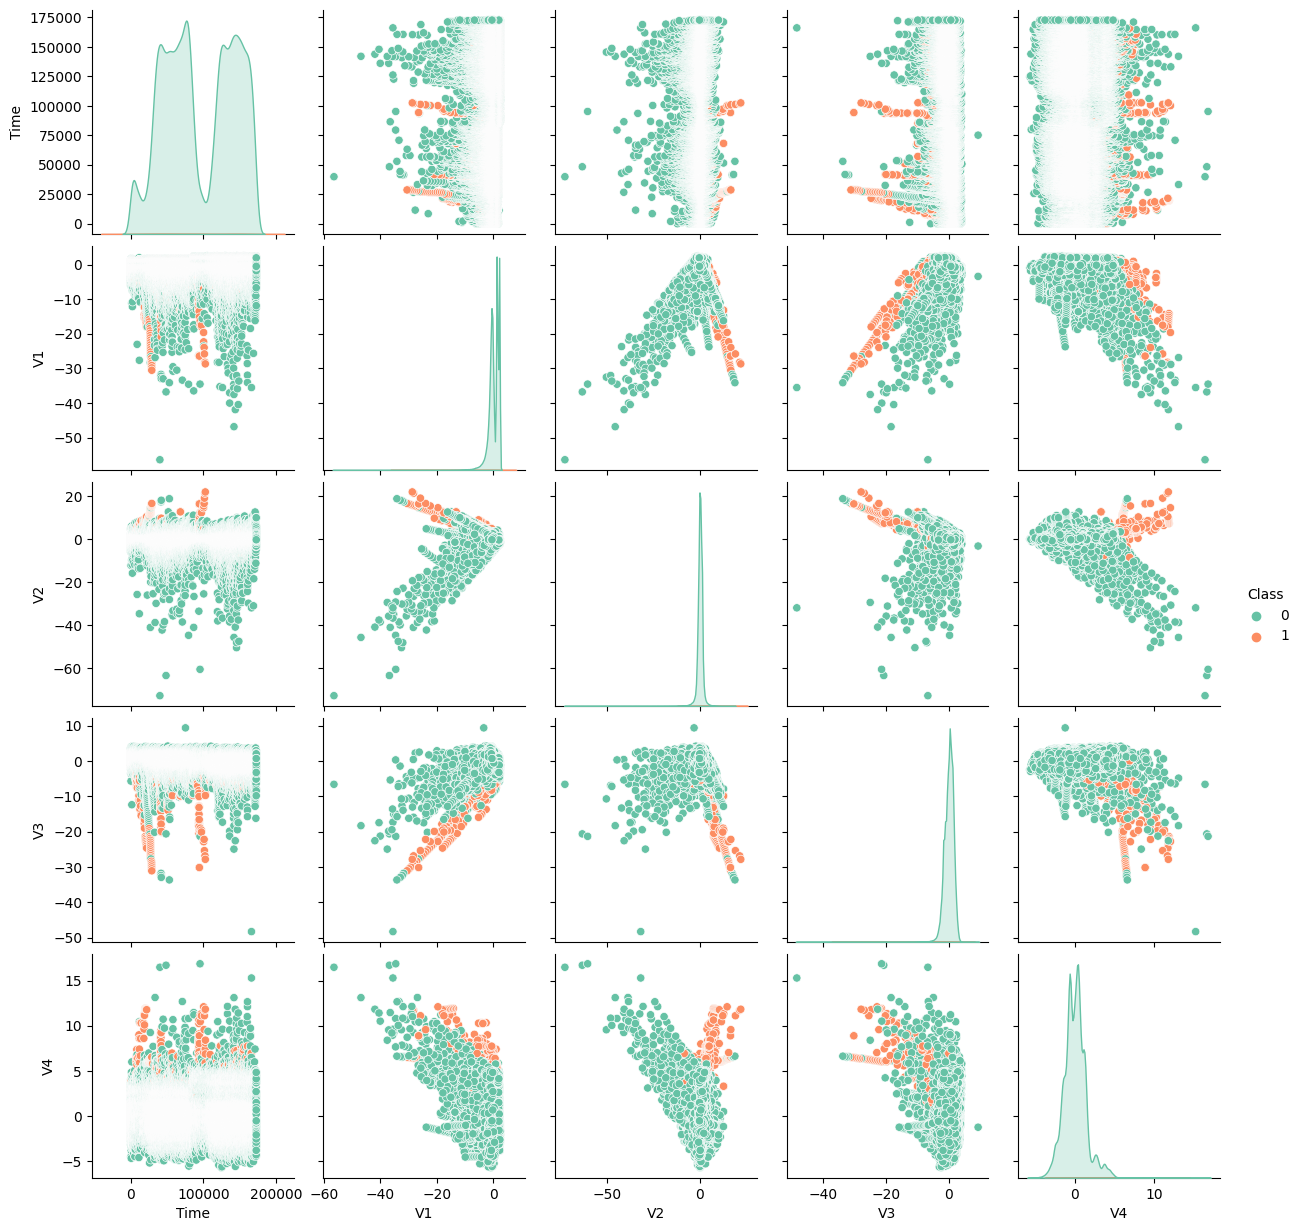

In [5]:
# Load the Dataset
file_path = '/kaggle/input/creditcardfraud/creditcard.csv'
df = pd.read_csv(file_path)

# Optimize Data Types
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)

# Handle Missing Data
df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
df.dropna(inplace=True)

# Visualize the Dataset
def visualize_dataset(df):
    # Print dataset information
    print(f"Dataset Shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    print("\nDataset Summary:")
    print(df.describe())
    
    print("\nClass Distribution:")
    print(df['Class'].value_counts())

    # Plot Class Distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Class', data=df, palette='viridis')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
    
    # Visualizing numeric features with a pairplot (selecting a subset if too many features)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    sampled_cols = numeric_cols[:5]  # Limit to first 5 numeric columns for visualization
    sampled_df = df[sampled_cols + ['Class']]
    
    print(f"\nVisualizing a subset of numeric features: {sampled_cols}")
    sns.pairplot(sampled_df, hue='Class', diag_kind='kde', palette='Set2')
    plt.show()

# Call the function
visualize_dataset(df)
